# 期末大作业说明
> __`需求`__:
- 从一个城市高等院校的排名及数量，可以它的发展水平。
- 通过分析一个城市的高校情况，可以为选择就学、就业于某城市提供一定的参考。

> __`思路`__:
- 1.利用bs4、urllib库从我国权威大学排名网站获取指定年份的大学排名数据
- 2.利用pandas库将数据汇总整理到excel文件并实现分组、汇总、排序的操作
- 3.利用matplotlib、seaborn、numpy等库将处理好的数据以散点图的形式呈现

# Step1-获取数据

In [148]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
year=input('please input the year you want search:')  #目前该网页的有效数据为2015-2019
html = urlopen('http://www.zuihaodaxue.cn/zuihaodaxuepaiming%s.html'%(year)) #  %s 使得该方法一般化
bs = BeautifulSoup(html.read(),'html.parser')   # html.parser 是一种解析方式


bs.find_all('tr',{'class':'alt'})


Rank=[]
Univ=[]
Country=[]
for tr in bs.find_all('tr',{'class':'alt'}):
    tdlist = tr.find_all('td')
    a=0
    
    rank = tdlist[a].get_text()
    Rank.append(rank)
    univ = tdlist[a+1].get_text()
    Univ.append(univ)
    country = tdlist[a+2].get_text()
    Country.append(country)
    print("{:<10}\t{:<20}\t{:<11}".format(rank,univ,country))    #  目的是使得结果能够对齐显示

please input the year you want search:2019
1         	清华大学                	北京         
2         	北京大学                	北京         
3         	浙江大学                	浙江         
4         	上海交通大学              	上海         
5         	复旦大学                	上海         
6         	中国科学技术大学            	安徽         
7         	华中科技大学              	湖北         
7         	南京大学                	江苏         
9         	中山大学                	广东         
10        	哈尔滨工业大学             	黑龙江        
11        	北京航空航天大学            	北京         
12        	武汉大学                	湖北         
13        	同济大学                	上海         
14        	西安交通大学              	陕西         
15        	四川大学                	四川         
16        	北京理工大学              	北京         
17        	东南大学                	江苏         
18        	南开大学                	天津         
19        	天津大学                	天津         
20        	华南理工大学              	广东         
21        	中南大学                	湖南         
22        	北京师范大学              	北

# Step-分析数据

In [149]:
document={'Rank':Rank,'Univ':Univ,'Country':Country}  #将获取的信息存入字典，以便创建excel文件

In [150]:
import pandas as pd

df = pd.DataFrame(document)
df=df.set_index('Rank')
df.to_excel('D:/pandas/la.xlsx')

In [145]:
orders = pd.read_excel('D:/pandas/la.xlsx')

In [146]:
print(orders)

     Rank      Univ Country
0       1      清华大学      北京
1       2      北京大学      北京
2       3      浙江大学      浙江
3       4    上海交通大学      上海
4       5      复旦大学      上海
..    ...       ...     ...
544   544      莆田学院      福建
545   544      枣庄学院      山东
546   547    浙江树人学院      浙江
547   548     平顶山学院      河南
548   549  湖南涉外经济学院      湖南

[549 rows x 3 columns]


# Step-呈现数据

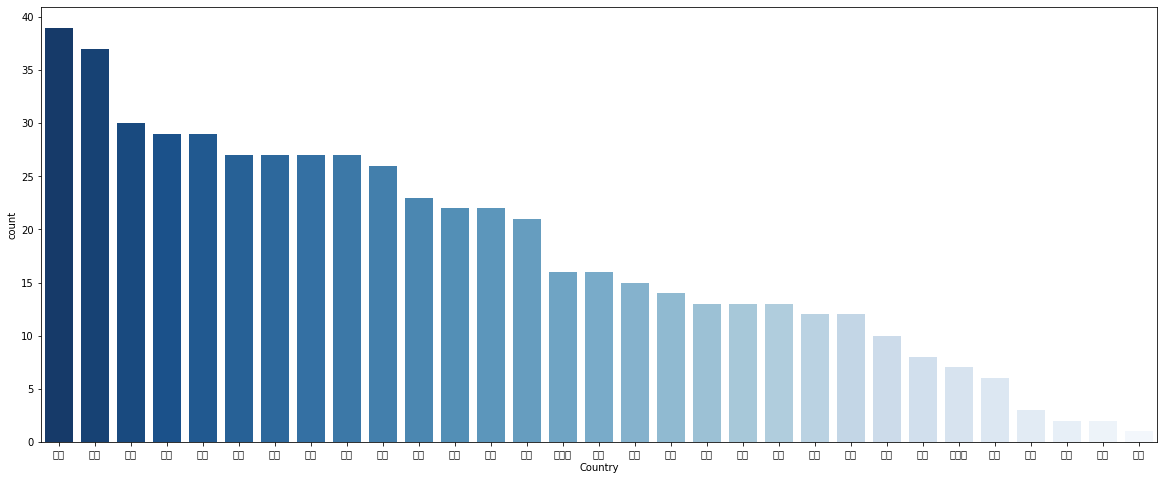

In [155]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np


plt.figure(figsize=(20,8))
sns.countplot('Country',
              data=orders,order=orders['Country'].value_counts().index,
              palette='Blues_r')